In [26]:
# Importing packages
import networkx as net
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import csv
# Importing packages used to display images
from PIL import Image
import requests
from io import BytesIO


In [27]:
road = pd.read_csv("https://raw.githubusercontent.com/VioletaStoyanova/Data620/master/Assignment2/soc-sign-bitcoinalpha.csv", 
                    header=None, sep=',',skiprows=4,
                    names=['SOURCE','TARGET','RATING','TIME'])

road.head(5)


,SOURCE,TARGET,RATING,TIME
0,3010,1,10,1347854400
1,804,1,10,1337572800
2,160,1,10,1394683200
3,95,1,9,1384578000
4,377,1,7,1414728000


In [28]:
def _get_graph_file():
   G = nx.DiGraph()
   #Pass the file object to csv reader
   git = csv.reader(road,delimiter=',')

   #Ignore the headers
   headers = git.next()

   #Ignore the line between headers and actual data
   git.next()

   #git is the variable to be passed, not git_df
   G.add_weighted_edges_from(git.values)
   # to check if the number of edges are correct
   G.number_of_edges()
   return G

In [32]:
#Building a graph directly using pandas data frame:
G=nx.from_pandas_edgelist(road,source="SOURCE",target="TARGET")


In [33]:
print(net.info(G))

Name: 
Type: Graph
Number of nodes: 3782
Number of edges: 14122
Average degree:   7.4680


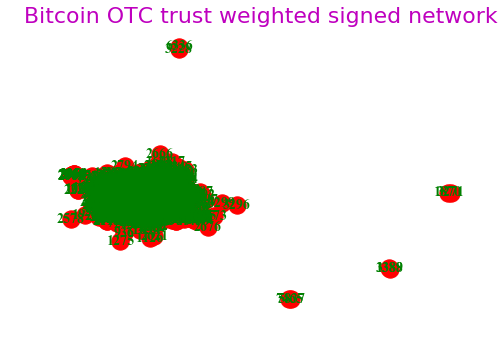

In [37]:
import matplotlib.pyplot as plt
nx.draw(G, labels=None,font_size=14, font_color='g',font_family='times new roman')
plt.title('Bitcoin OTC trust weighted signed network', size=22, color='m')

plt.show()

In [38]:
net.is_connected(G) #we can see that some components of the graph are disconnected 

False

In [39]:
G_list = list(net.connected_component_subgraphs(G))
print("There are {0} subgraphs".format(len(G_list)))

x = 1
for i in G_list:
    print("----------------------------------")
    print("Summary details of sub-graph: {0} ".format(x))
    print("----------------------------------")
    x += 1
    print(net.info(i))
    print("Diameter:{0}".format(net.diameter(i)))
    print("Radius:{0}".format(net.radius(i)))

There are 5 subgraphs
----------------------------------
Summary details of sub-graph: 1 
----------------------------------
Name: 
Type: Graph
Number of nodes: 3774
Number of edges: 14118
Average degree:   7.4817
Diameter:10
Radius:5
----------------------------------
Summary details of sub-graph: 2 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 3 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 4 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 5 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of